## 다익스트라 vs 플로이드-워셜

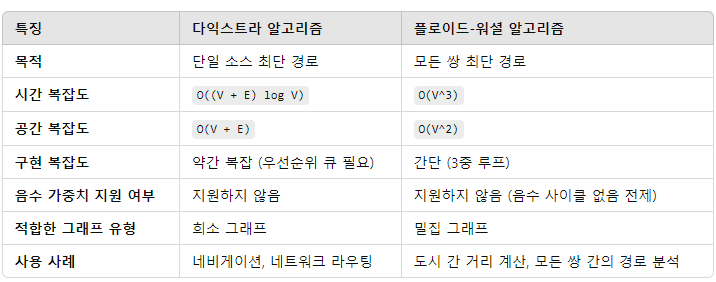

- 문제의 요구 사항:  
  - 단일 소스 최단 경로가 필요한 경우: 다익스트라  
  - 모든 쌍의 최단 경로가 필요한 경우: 플로이드-워셜  
  
- 그래프의 특성:  
 - 희소 그래프인 경우: 다익스트라가 효율적.  
 - 밀집 그래프인 경우: 플로이드-워셜이 적합.  
  
- 구현의 간편성:  
  - 단순 구현을 원한다면 플로이드-워셜이 더 직관적일 수 있음.  
  - 효율적인 실행을 원한다면 다익스트라가 우선.  

### [합승 택시 요금](https://school.programmers.co.kr/learn/courses/30/lessons/72413)

In [ ]:
def solution(n, s, a, b, fares):
    # 무한대를 나타내는 값 설정
    INF = int(1e9)
    
    # 1-based indexing을 위해 (n+1) x (n+1) 크기의 거리 테이블 초기화
    distance = [[INF] * (n + 1) for _ in range(n + 1)]
    
    # 자기 자신으로 가는 비용은 0
    for i in range(1, n + 1):
        distance[i][i] = 0
    
    # 주어진 요금 정보로 거리 테이블 업데이트
    for c, d, f in fares:
        distance[c][d] = f
        distance[d][c] = f  # 양방향 이동 가능
    
    # 플로이드-워셜 알고리즘 수행
    for k in range(1, n + 1):
        for i in range(1, n + 1):
            for j in range(1, n + 1):
                if distance[i][j] > distance[i][k] + distance[k][j]:
                    distance[i][j] = distance[i][k] + distance[k][j]
    
    # 최소 요금 계산
    min_fare = INF
    for k in range(1, n + 1):
        total_fare = distance[s][k] + distance[k][a] + distance[k][b]
        if total_fare < min_fare:
            min_fare = total_fare
    
    return min_fare


In [ ]:
import heapq

def solution(n, s, a, b, fares):
    # 인접 리스트 생성
    graph = [[] for _ in range(n + 1)]
    for c, d, f in fares:
        graph[c].append((d, f))
        graph[d].append((c, f))
    
    def dijkstra(start):
        INF = int(1e9)
        distance = [INF] * (n + 1)
        distance[start] = 0
        heap = []
        heapq.heappush(heap, (0, start))
        
        while heap:
            current_dist, current_node = heapq.heappop(heap)
            
            if current_dist > distance[current_node]:
                continue
            
            for neighbor, weight in graph[current_node]:
                distance_through_current = current_dist + weight
                if distance[neighbor] > distance_through_current:
                    distance[neighbor] = distance_through_current
                    heapq.heappush(heap, (distance[neighbor], neighbor))
        
        return distance
    
    # 각 지점에서의 최단 거리 계산
    distance_from_s = dijkstra(s)
    distance_from_a = dijkstra(a)
    distance_from_b = dijkstra(b)
    
    # 최소 요금 초기화
    min_fare = int(1e9)
    
    # 모든 지점을 합승 지점으로 고려
    for k in range(1, n + 1):
        total_fare = distance_from_s[k] + distance_from_a[k] + distance_from_b[k]
        if total_fare < min_fare:
            min_fare = total_fare
    
    return min_fare


-----

## BFS, DFS 정리

### BFS(너비 우선 탐색)
BFS는 레벨 별로(즉, 시작 노드에서부터의 거리가 같은 노드들을 그룹으로) 노드를 탐색합니다. 큐(Queue)를 사용하여 구현하며, 다음과 같은 특징과 사용 시기가 있습니다:  
  
[특징]  
- 모든 노드를 균등하게 탐색합니다.  
- 최단 경로를 보장합니다 (가중치가 없는 그래프에서).  
- 메모리 사용이 DFS에 비해 많을 수 있습니다 (넓은 트리에서).  

[사용 시기]  
- 최단 경로나 최소 이동 횟수를 구할 때 효과적입니다 (예: 미로 최단 거리).  
- 그래프의 모든 레벨을 탐색해야 할 때.  
- 노드가 깊이에 비해 넓게 분포된 경우.

### DFS(깊이 우선 탐색)
DFS는 가능한 한 깊숙이 노드를 탐색하며, 스택(Stack) 또는 재귀 함수로 구현합니다. 다음은 DFS의 특징과 적합한 사용 시기입니다:

[특징]  
- 깊은 노드를 우선적으로 탐색하며, 뒤로 돌아가 다른 경로를 탐색합니다.  
- 메모리 사용이 상대적으로 적을 수 있습니다 (현재 경로상의 노드만 기억).  
- 최단 경로를 보장하지 않습니다.  

[사용 시기]  
- 모든 가능한 해를 탐색해야 할 때 (예: 퍼즐 게임).  
- 해가 깊게 숨어 있을 것으로 예상될 때.  
- 그래프가 매우 깊고, 넓지 않을 때 (깊은 트리).  

### 결정 요인
- 경로의 특성: 최단 경로가 필요하면 BFS, 가능한 모든 경로를 탐색해야 하면 DFS.
- 그래프의 크기와 형태: 그래프가 매우 넓다면 DFS가 메모리 측면에서 효율적일 수 있고, 그래프가 매우 깊고 넓지 않다면 BFS를 사용하는 것이 과도한 메모리 소모를 줄일 수 있습니다.
- 해결해야 할 문제의 종류: 순환 감지, 정렬, 연결 요소 탐색 등 명확한 목적에 따라 적합한 탐색 방식이 달라집니다.

## DefaultDict
- python 내장 dictionary와의 차이는 아직 존재하지 않는 키 값에 추가할 때, 'dictionary'는 해당 키값을 초기화한 뒤 이후에 값을 추가할 수 있는 반면, defaultdict는 값을 추가할 때 해당 키값이 존재하지 않으면 새로 만들어 진행함

In [1]:
from collections import defaultdict

# 기본 값이 리스트인 defaultdict
dd = defaultdict(list)

# 'a'라는 키에 접근
dd['a'].append(1)  # 'a'가 없지만, 자동으로 빈 리스트가 생성되고 1이 추가됨

print(dd)  # defaultdict(<class 'list'>, {'a': [1]})


defaultdict(<class 'list'>, {'a': [1]})


In [2]:
# 일반적인 dictionary
d = {}

# 'a'라는 키에 접근하려고 하면 에러 발생
try:
    d['a'].append(1)  # KeyError 발생
except KeyError:
    print(f"해당 dictionary에는 해당 키('a')가 존재하지 않습니다")

# 키가 없으면 수동으로 값을 초기화해야 함
if 'a' not in d:
    d['a'] = []
d['a'].append(1)

print(d)  # {'a': [1]}


해당 dictionary에는 해당 키('a')가 존재하지 않습니다
{'a': [1]}


In [5]:
from collections import defaultdict
import string
import time
import random

# 알파벳 소문자 리스트
letters = string.ascii_lowercase

# 'a'부터 'zz'까지 리스트 생성
key_list = [a + b for a in [''] + list(letters) for b in letters]
s_time = time.time()

test = defaultdict(list)
for _ in range(1000):
    k, v = random.choice(key_list), random.randint(1, 10000000)
    test[k].append(v)
print(f'단위 테스트(1,000) 소요시간: {time.time() - s_time:.2f}초')

s_time = time.time()
test = defaultdict(list)
for _ in range(100000):
    k, v = random.choice(key_list), random.randint(1, 10000000)
    test[k].append(v)
print(f'단위 테스트(100,000) 소요시간: {time.time() - s_time:.2f}초')

s_time = time.time()
test = defaultdict(list)
for _ in range(100_000_000):
    k, v = random.choice(key_list), random.randint(1, 10000000)
    test[k].append(v)
print(f'단위 테스트(100,000,000) 소요시간: {time.time() - s_time:.2f}초')

단위 테스트(1,000) 소요시간: 0.56초
단위 테스트(100,000) 소요시간: 0.14초
단위 테스트(100,000,000) 소요시간: 134.85초


In [6]:
s_time = time.time()
test = defaultdict(list)
for _ in range(1000):
    k, v = random.choice(key_list), random.randint(1, 10000000)
    try: 
        test[k].append(v)
    except:
        test[k] = v
print(f'단위 테스트(1,000) 소요시간: {time.time() - s_time:.2f}초')

s_time = time.time()
test = defaultdict(list)
for _ in range(100000):
    k, v = random.choice(key_list), random.randint(1, 10000000)
    try: 
        test[k].append(v)
    except:
        test[k] = v
print(f'단위 테스트(100,000) 소요시간: {time.time() - s_time:.2f}초')

s_time = time.time()
test = defaultdict(list)
for _ in range(100_000_000):
    k, v = random.choice(key_list), random.randint(1, 10000000)
    try: 
        test[k].append(v)
    except:
        test[k] = v
print(f'단위 테스트(100,000,000) 소요시간: {time.time() - s_time:.2f}초')

단위 테스트(1,000) 소요시간: 4.75초


단위 테스트(100,000) 소요시간: 0.14초
단위 테스트(100,000,000) 소요시간: 134.66초
